### Importando as bibliotecas

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#dataframe do o arquivo .xlsx
df = pd.read_excel("STG_FNT_ITT.xlsx")

### Exibindo os primeiros valores

In [51]:
df.head()

,ID_STG_FNT_ITT,NUM_CNPJ,NUM_CMP_CNPJ,NOM_COM,NOM_RAZ_SCL,DAT_INC_DBO
0,137,2427884087,2805,NMN,NMN,2019-12-19 13:43:41.914
1,183,12182674487,2635,NMN,NMN,2019-12-19 13:43:41.914
2,197,16167328168,1802,NMN,NMN,2019-12-19 13:43:41.914
3,267,279925978,2329,NMN,NMN,2019-12-19 13:43:41.914
4,322,20579036860,2397,NMN,NMN,2019-12-19 13:43:41.914


#### Calculando a amostra a ser analisada

In [52]:
#id_qtd - IDs sempre serão diferentes de vazio
id_qtd = df.query('(ID_STG_FNT_ITT != "")')['ID_STG_FNT_ITT'].count()

#### Convertendo os campos da coluna NUM_CNPJ

In [53]:
# para o laço for
df.astype({'NUM_CNPJ': 'str'}).dtypes

ID_STG_FNT_ITT     int64
NUM_CNPJ          object
NUM_CMP_CNPJ       int64
NOM_COM           object
NOM_RAZ_SCL       object
DAT_INC_DBO       object
dtype: object

#### Dicionários para consulta futura

In [54]:
# validação
cnpj_valido, cnpj_nao_valido = [], []

# misc.
cnpj_mais, cnpj_menos = [], []

### Validando os inserts (campos)

#### Exatamente 14 caracteres

In [55]:
for c in df.NUM_CNPJ:
    if len(str(c)) == 10:
        cnpj_valido.append(c)
    else: cnpj_nao_valido.append(c)

#### Mais de 14 caracteres

In [68]:
for c in df.NUM_CNPJ:
    if len(str(c)) >= 11:
        cnpj_mais.append(c)

#### Menos de 14 Caracteres

In [57]:
for c in df.NUM_CNPJ:
    if len(str(c)) <= 9:
        cnpj_menos.append(c)

### Cálculos para os gráficos

#### Calculando as quantidades / porcentagens (válidos e não válidos)

In [58]:
#CNPJs válidos
op_vld = len(cnpj_valido)
vld = (op_vld*100) / id_qtd

#CNPJs não válidos
op_nvld = len(cnpj_nao_valido)
nvld = (op_nvld*100) / id_qtd

#### Calculando as quantidades / porcentagens (Caracteres)

In [88]:
# +14 Char
op_mais14 = len(cnpj_mais)
mais_14_char = (op_mais14*100) / id_qtd

# -14 Char
op_menos14 = len(cnpj_menos)
menos_14_char = (op_menos14*100) / id_qtd

### Gráfico 01 - CNPJ válido (14 caracteres) 

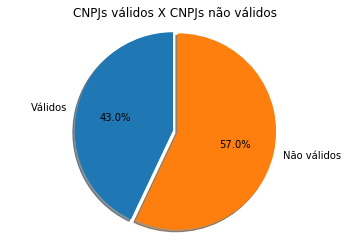

In [59]:
labels = 'Válidos', 'Não válidos'
sizes = [vld, nvld]
explode = (0, 0.05)

fig1, ax1 = plt.subplots()
ax1.set_title('CNPJs válidos X CNPJs não válidos')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

### Gráfico 02 - Qualidade geral

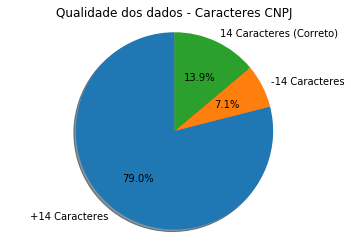

In [83]:
labels = '+14 Caracteres', '-14 Caracteres', '14 Caracteres (Correto)'
sizes = [mais_14_char, menos_14_char, vld]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.set_title('Qualidade dos dados - Caracteres CNPJ')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()